<a href="https://colab.research.google.com/github/ariefwcks303/MachineLearningFromScratch/blob/main/Studi_Kasus_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library, Dataset, Metrics, Model

In [2]:
#untuk manipulasi data dalam bentuk tabel (DataFrame).
import pandas as pd

#untuk operasi matematika & komputasi numerik.
import numpy as np

#untuk visualisasi data (grafik).
import matplotlib.pyplot as plt

#dMengambil fungsi untuk membuat dataset klasifikasi sintetis (data dummy).
from sklearn.datasets import make_classification



#Memisahkan dataset menjadi data latih dan uji.
from sklearn.model_selection import train_test_split

#Memilih fitur terbaik berdasarkan skor. & Metode seleksi fitur menggunakan ANOVA F-value untuk klasifikasi.
from sklearn.feature_selection import SelectKBest, f_classif

#Mengubah fitur kategorikal menjadi fitur numerik biner. Normalisasi fitur agar memiliki mean=0 dan std=1. Membagi variabel numerik ke dalam beberapa bin (kategori).
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer

#Menerapkan preprocessing berbeda pada kolom tertentu.
from sklearn.compose import ColumnTransformer

#Menggabungkan beberapa tahapan preprocessing dan model agar rapih & otomatis.
from sklearn.pipeline import Pipeline

#Oversampling untuk menyeimbangkan kelas minoritas dengan menghasilkan data sintetis.
from imblearn.over_sampling import SMOTE

#Untuk menghitung jumlah sampel per kelas sebelum dan sesudah SMOTE.
from collections import Counter

#Algoritma ensemble yang menggunakan banyak decision tree untuk prediksi klasifikasi.
from sklearn.ensemble import RandomForestClassifier

#Persentase prediksi yang benar. Akurasi prediksi kelas positif. Kemampuan model menangkap kelas positif. Harmonik mean presisi dan recall → lebih stabil pada data tidak seimbang.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##Create Data

In [7]:
X,y = make_classification(n_samples=1000, n_features=15,
                          n_informative=10, n_redundant=2,
                          n_clusters_per_class=1, weights=[0.9],
                          flip_y=0, random_state=42)

- n_samples=1000	Total jumlah data (baris) = 1000
- n_features=15	Total fitur (kolom) = 15
- n_informative=10	Fitur yang benar-benar berpengaruh pada target = 10
- n_redundant=2	Fitur yang merupakan kombinasi linear dari fitur informatif = 2
- n_clusters_per_class=1	Tiap kelas hanya 1 cluster → pola data lebih sederhana
- weights=[0.9]	Imbalance class: 90% kelas utama, 10% kelas minoritas
- flip_y=0	Tidak menambahkan label noise (mislabeling)
- random_state=42	Seed untuk hasil yang konsisten setiap run

In [ ]:
##Create DataFrame

In [9]:
# Menyusun dataset menjadi DataFrame untuk kemudahan
df = pd.DataFrame(X, columns=[f'Fitur_{i}' for i in range(1, 16)])
df['Target'] = y
df.head()

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,1.459826,-1.024592,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,2.236310,-0.001984,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,0.671318,-3.175360,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,0.776033,-0.494986,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,3.038337,-0.391516,0.712335,2.810524,0


In [ ]:
#Create Simulation with change selected column to Categorical Variable

In [12]:
# Misalkan kita punya beberapa fitur kategorikal (simulasi fitur kategorikal)
df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=len(df))
df['Fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=len(df))
df.head()

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,B,Y,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,B,Y,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,C,X,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,A,Y,0.712335,2.810524,0


1. Membuat kolom baru bernama Fitur_12 & Fitur_13.

2. Isinya diisi acak dengan nilai kategori ('A', 'B', atau 'C') & ('X', 'Y', 'Z'.).

3. size=len(df) memastikan jumlah baris sama dengan jumlah baris DataFrame.

In [ ]:
#Split Features & Target Variable

In [13]:
# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

- Membuat variabel X yang berisi semua fitur (predictors).

- df.drop('Target', axis=1) berarti menghapus kolom 'Target' dari DataFrame pada axis=1 (kolom).

- Jadi X adalah dataset tanpa kolom label.

- Membuat variabel y yang hanya berisi kolom target/label untuk prediksi.

In [15]:
# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


Menghitung jumlah kemunculan setiap kelas dalam variabel target y

- Kelas 0 memiliki 901 sampel

- Kelas 1 memiliki 99 sampel

Terjadi ketidakseimbangan kelas (class imbalance) yang cukup besar
→ ± 90% : 10%

Kenapa ini penting?

-Model machine learning akan:

- Lebih sering memprediksi kelas yang mayoritas (0)

- Mengabaikan kelas minoritas (1), padahal kelas ini biasanya penting (misalnya fraud, penyakit langka)

Apa langkah selanjutnya?

Biasanya dilakukan penyeimbangan data seperti:

1. SMOTE (yang sudah kamu impor)

2. Oversampling / Undersampling

3. Teknik lain seperti Class weighting

Karena dataset ini memiliki fitur yang cukup banyak, pilihlah fitur (feature selection). Anda dapat menggunakan berbagai macam teknik feature selection yang sebelumnya sudah dipelajari pada materi feature selection. Namun, pada latihan ini mari kita gunakan teknik embedded agar terbiasa dengan teknik yang paling kompleks.

##Training Model with random forest

In [16]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(X_integer, y)

RandomForestClassifier(random_state=42)

Membuat model Random Forest Classifier.
1. n_estimators=100: menggunakan 100 decision trees.
2. random_state=42: membuat hasil model reproducible/ konsisten

3. Menghapus fitur kategorikal (Fitur_12, Fitur_13) sementara karena Random Forest belum bisa langsung menangani string/kategori.
4. Menyimpan hasilnya ke variabel X_integer yang hanya berisi fitur numerik.


Melatih model Random Forest menggunakan:
- X_integer sebagai input fitur numerik
- y sebagai target/label
Dari model yang sudah terlatih ini, feature importance dapat diekstrak untuk seleksi fitur.

In [17]:
# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

Mengambil nilai importance dari setiap fitur yang dipelajari model Random Forest.

- feature_importances_ adalah atribut yang menunjukkan seberapa besar kontribusi tiap fitur dalam membuat keputusan model.

- Hasil berupa array numerik panjangnya = jumlah fitur.


np.argsort(importances) → Mengurutkan indeks fitur berdasarkan nilainya dari kecil ke besar.

- [::-1] → Membalik urutan agar menjadi besar ke kecil (descending order).

Tujuannya:
→ Mendapatkan urutan fitur paling penting hingga paling tidak penting.

In [20]:
# Menentukan ambang batas untuk fitur penting
threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

Menentukan nilai ambang batas (threshold) untuk memilih fitur penting.

- Hanya fitur dengan feature importance ≥ 0.05 yang akan dianggap penting.

Membuat list comprehension untuk menyimpan indeks fitur yang penting.

- range(len(importances)) → iterasi melalui semua fitur.

- Kondisi if importances[i] >= threshold → hanya memilih fitur dengan importance cukup besar sesuai batas.

Tujuan

✔ Menyaring fitur terbaik berdasarkan kontribusi terhadap model

✔ Menghasilkan daftar indeks fitur yang akan digunakan pada tahap berikutnya

In [23]:
# Menampilkan fitur penting beserta nilainya
print("Fitur penting beserta nilainya:")
for i in important_features_indices:
    print(f"{X_integer.columns[i]}:{importances[i]}")

Fitur penting beserta nilainya:
Fitur_2:0.11860019897866206
Fitur_3:0.06878603593465271
Fitur_5:0.07731131335837178
Fitur_8:0.050482655781999855
Fitur_9:0.2625049418105367
Fitur_10:0.08958259568334655
Fitur_11:0.06365230544114515
Fitur_15:0.12578161860669113


- Melakukan loop pada setiap indeks fitur penting yang sudah dipilih sebelumnya.

- Mencetak nama fitur (X_integer.columns[i])

- Menampilkan nilai feature importance yang sesuai (importances[i])

- Menggunakan f-string → format string lebih mudah dibaca


In [28]:
# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_integer.columns[important_features_indices]

- Mengambil nama-nama kolom dari fitur penting berdasarkan indeks yang telah diseleksi sebelumnya.

- Hasil berupa daftar kolom yang memiliki feature importance ≥ threshold.

In [29]:
# Memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]

- Membuat DataFrame baru hanya berisi fitur-fitur penting saja.

- Fitur yang tidak terlalu berpengaruh dibuang dari dataset.

In [31]:
# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:",X_important.shape)


Dimensi data pelatihan dengan fitur penting: (1000, 8)


Menampilkan jumlah baris dan kolom pada dataset fitur penting.

 Di sini, kita menentukan ambang batas hubungan antara variabel sebesar 5% sehingga mendapatkan delapan fitur dengan tipe data numerik.

##Join X_Important with Data Cat

In [34]:
X_selected = pd.concat([X_important, df[['Fitur_12', 'Fitur_13']]], axis=1)
X_selected.head()

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,B,Y
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,B,Y
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,C,X
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,C,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,A,Y


- Menggabungkan dua DataFrame{X_important, df['Fitur_12','Fitur_13'] secara horizontal (berdampingan kolom)
- Menampilkan 5 baris pertama dari DataFrame X_selected

In [ ]:
##Ubah data menggunakan Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_selected['Fitur_12'] = label_encoder.fit_transform(X_selected['Fitur_12'])
X_selected['Fitur_13'] = label_encoder.fit_transform(X_selected['Fitur_13'])

print(X_selected.head())

    Fitur_2   Fitur_3   Fitur_5  ...  Fitur_15  Fitur_12  Fitur_13
0 -3.472520 -1.314199  0.642138  ... -0.276558         1         1
1 -1.770842 -1.578851 -2.025230  ...  0.285979         1         1
2 -2.051770  3.631998  1.674093  ... -2.867291         2         0
3 -1.608657 -0.735184 -1.753532  ...  1.255376         2         0
4 -2.362885 -3.909120 -4.029843  ...  2.810524         0         1

[5 rows x 10 columns]


1. Mengimpor LabelEncoder dari scikit-learn
    - Digunakan untuk mengubah nilai kategorikal menjadi angka (numerik)

2. Membuat objek encoder yang nantinya dipakai untuk transformasi label kategori

3. fit_transform():
    - fit → mempelajari daftar kategori unik dalam Fitur_12 & Fitur_13
    - transform → mengubah kategori menjadi angka,

In [36]:
X_selected.head()

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,1,1
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,1,1
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,2,0
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,2,0
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,0,1


## Check Outlier

In [40]:
# Memilih kolom numerik
numeric_columns = X_selected.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])

X_cleaned = X_important.copy()

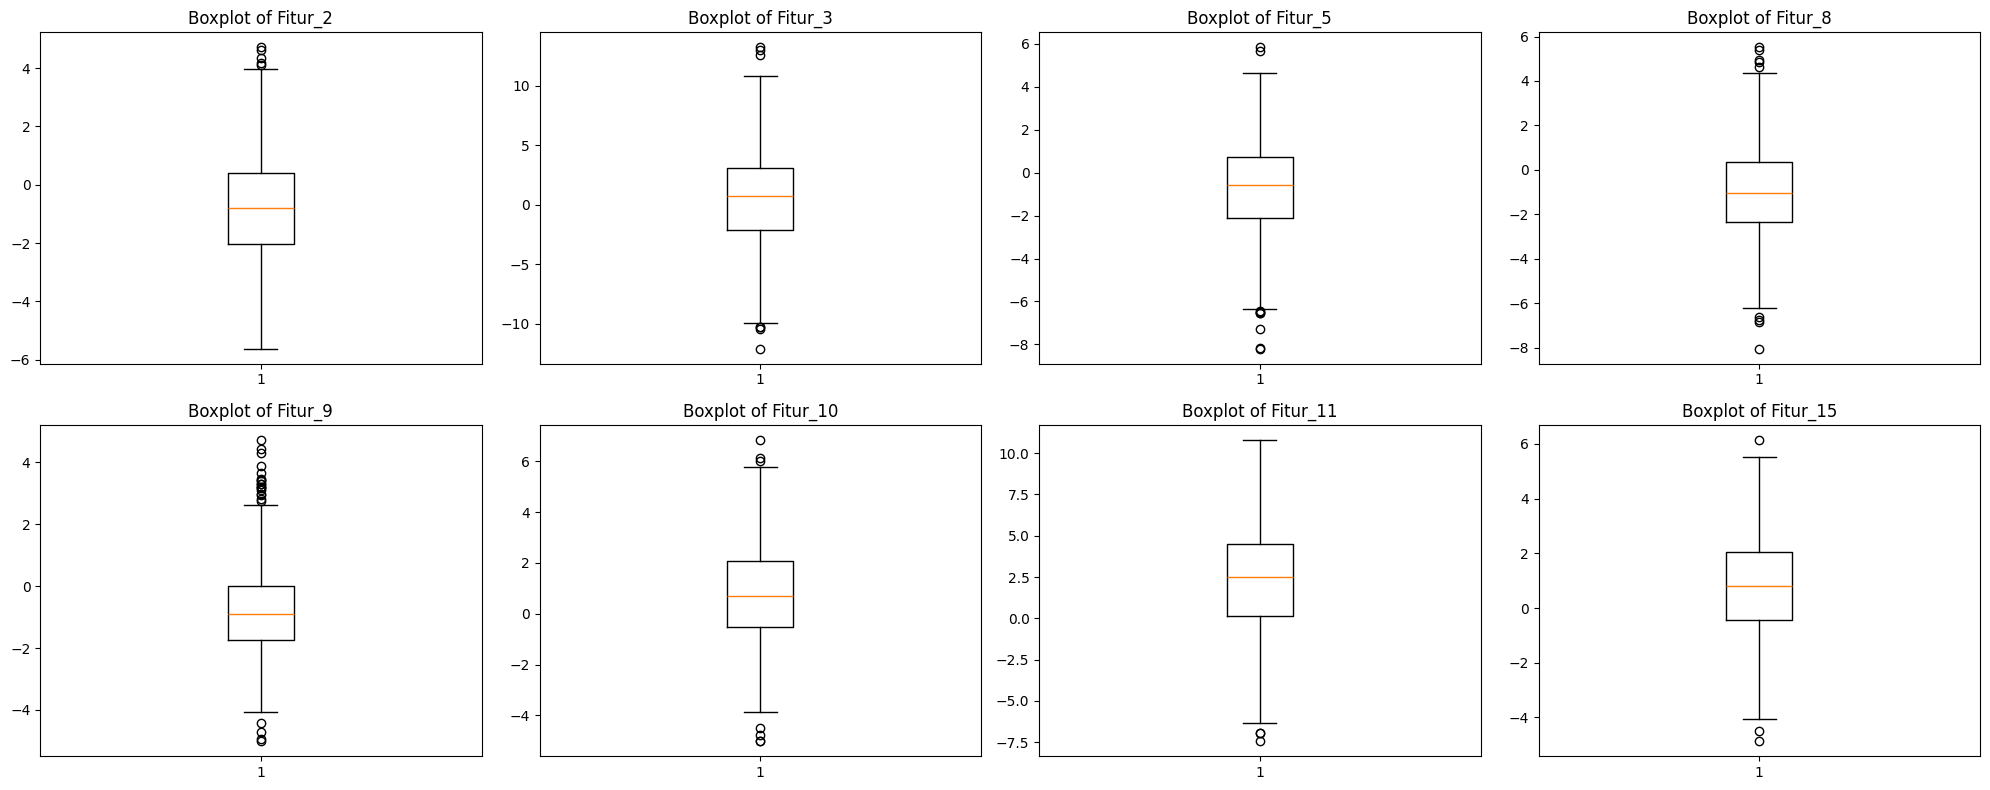

In [46]:
import math
#visualisasi kan kolom numerik dengan boxplot


#Menghitung jumlah kolom numerik yang akan divisualisasikan.
num_features = len(numeric_columns)

#Banyak baris subplot = 2 baris.
num_rows = 2

#Menghitung jumlah kolom subplot, dibulatkan ke atas agar semua fitur cukup dalam grid.
num_cols = math.ceil(num_features / num_rows)


#Membuat layout subplot sesuai jumlah baris & kolom.
#figsize mengatur ukuran seluruh gambar agar terlihat proporsional.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))

#Mengubah grid axes 2D menjadi list 1D agar mudah di-looping.
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration


#Loop tiap kolom numerik
#Membuat boxplot untuk setiap kolom
#Memberikan judul sesuai nama fitur
for i, column in enumerate(numeric_columns):
    axes[i].boxplot(X_cleaned[column])
    axes[i].set_title(f'Boxplot of {column}')


#Jika subplot lebih banyak daripada jumlah fitur,
#subplot yang tidak terpakai akan dihapus agar visualisasi rapi.
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



#tight_layout() → merapikan jarak antar subplot
#show() → menampilkan plot di jendela output
plt.tight_layout()
plt.show()


###Delete Outlier


In [47]:
#Melakukan iterasi untuk setiap kolom numerik dalam dataset.
for col in numeric_columns:

    #Kuartil pertama (25%)
    #Kuartil ketiga (75%)
    #Digunakan untuk mengetahui sebaran data utama.
    q1 = X_important[col].quantile(0.25)
    q3 = X_important[col].quantile(0.75)

    #IQR = Interquartile Range
    #Menunjukkan jarak antara Q3 dan Q1 (area data yang dianggap normal).
    iqr = q3 - q1

    #Nilai < lower_bound
    #Nilai > upper_bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #Filter data yang berada di luar batas
    outlier = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]

    #Menghapus baris yang terdeteksi sebagai outlier di kolom tersebut
    X_cleaned = X_cleaned.drop(outlier.index)

In [ ]:
##Check sesudah penghapusan Outlier

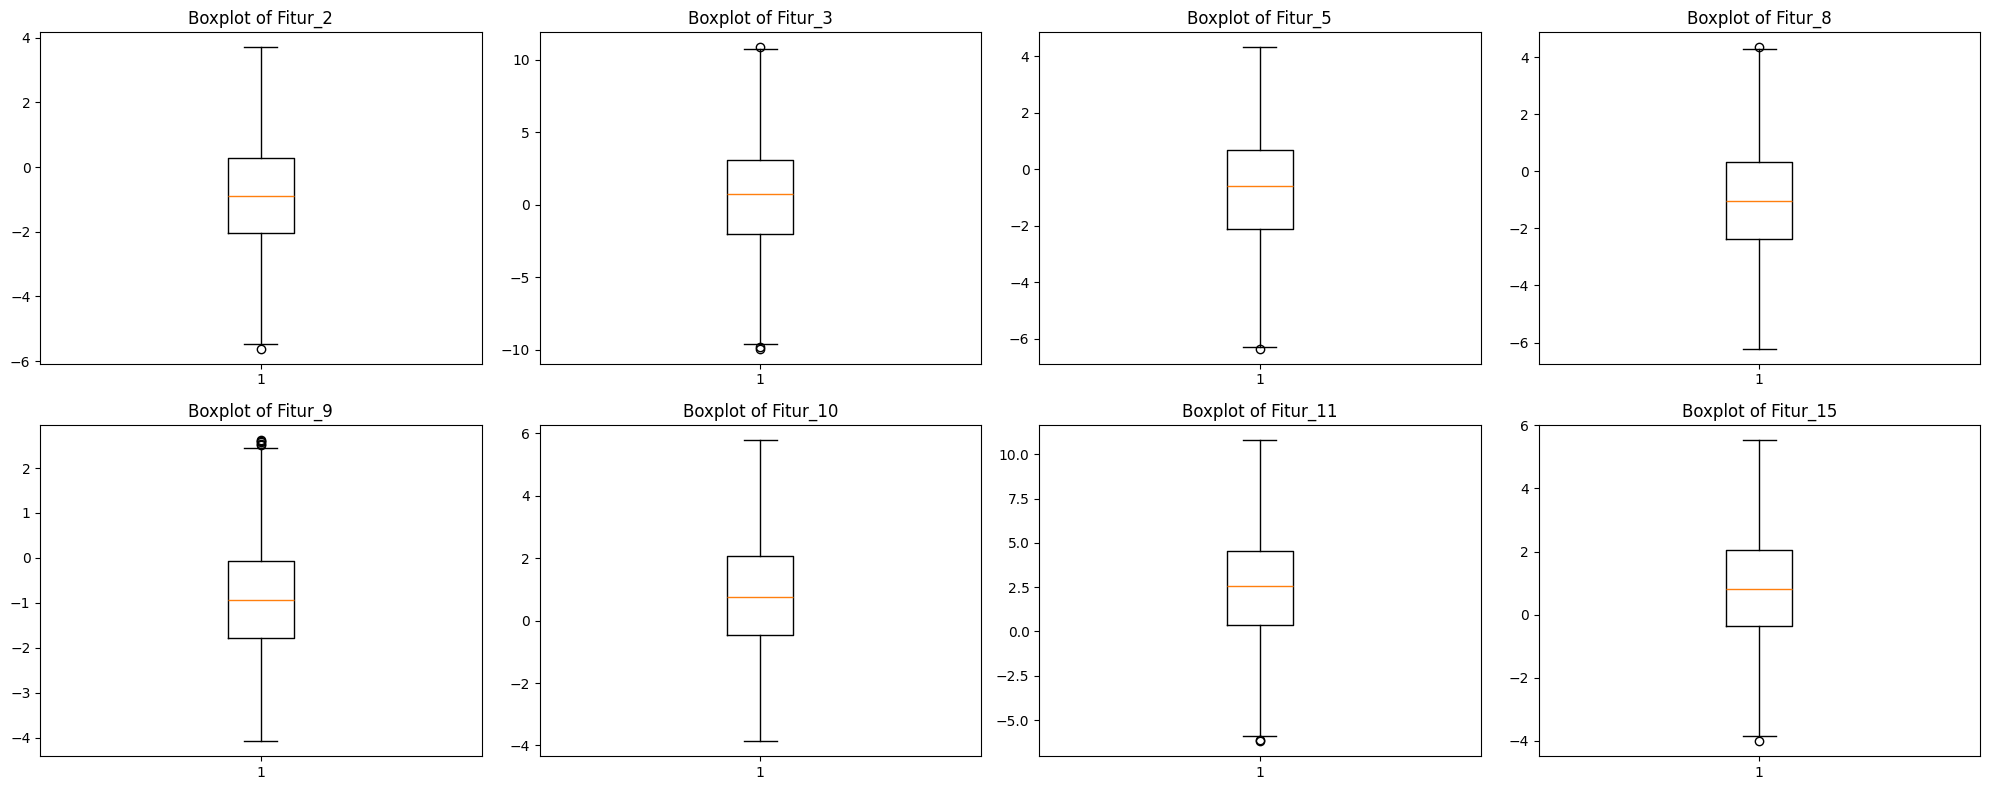

In [48]:
import math
#visualisasi kan kolom numerik dengan boxplot


#Menghitung jumlah kolom numerik yang akan divisualisasikan.
num_features = len(numeric_columns)

#Banyak baris subplot = 2 baris.
num_rows = 2

#Menghitung jumlah kolom subplot, dibulatkan ke atas agar semua fitur cukup dalam grid.
num_cols = math.ceil(num_features / num_rows)


#Membuat layout subplot sesuai jumlah baris & kolom.
#figsize mengatur ukuran seluruh gambar agar terlihat proporsional.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))

#Mengubah grid axes 2D menjadi list 1D agar mudah di-looping.
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration


#Loop tiap kolom numerik
#Membuat boxplot untuk setiap kolom
#Memberikan judul sesuai nama fitur
for i, column in enumerate(numeric_columns):
    axes[i].boxplot(X_cleaned[column])
    axes[i].set_title(f'Boxplot of {column}')


#Jika subplot lebih banyak daripada jumlah fitur,
#subplot yang tidak terpakai akan dihapus agar visualisasi rapi.
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



#tight_layout() → merapikan jarak antar subplot
#show() → menampilkan plot di jendela output
plt.tight_layout()
plt.show()

In [49]:
X_cleaned

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


Sisa jumlah data setelah penghapusan outlier adalah 949 data

##Synthetic Minority Oversampling Technique

In [54]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Filter y untuk mencocokkan baris X_cleaned setelah penghapusan outlier
y_cleaned = y.loc[X_cleaned.index]

# 3. Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Mengubah hasil menjadi DataFrame untuk visualisasi atau analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({0: 875, 1: 875})


➡️ SMOTE menambah data baru pada kelas minoritas (1) dengan teknik synthetic sampling

➡️ Jumlah keduanya sekarang seimbang → dataset tidak bias terhadap kelas mayoritas

**Efek terhadap model ML**

➕ Kelebihan:

    - Model tidak “berpihak” pada kelas mayoritas

    - Akurasi lebih adil, terutama recall kelas minoritas

➖ Kekurangan (perlu diperhatikan):

    - SMOTE menambah data sintetis, bukan data asli

    - Perlu evaluasi pakai ROC-AUC, F1-score, bukan hanya Accuracy

In [55]:
import seaborn as sns

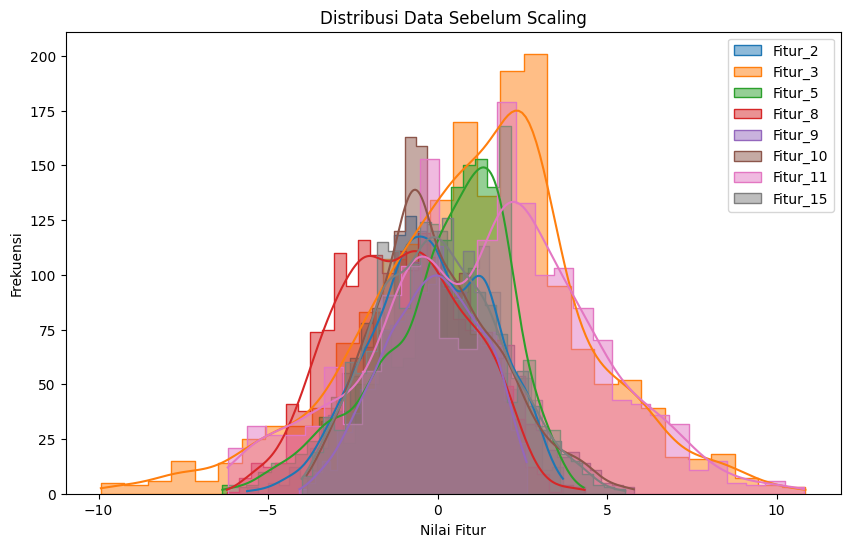

In [56]:
#Visualisasi distribusi data sebelum scaling menggunakan histogram

plt.figure(figsize=(10, 6))
for column in X_resampled.columns:
    sns.histplot(X_resampled[column], kde=True, label=column, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling')
plt.xlabel('Nilai Fitur')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [57]:
# Scaling: Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

1. Membuat objek StandardScaler
    - StandardScaler adalah metode normalisasi data dengan mengubah skala fitur

2. fit() → menghitung mean dan standard deviation dari fitur penting

3. transform() → mengubah nilai fitur menggunakan parameter tersebut
    - Hasilnya diganti pada dataset X_resampled hanya untuk kolom important_features

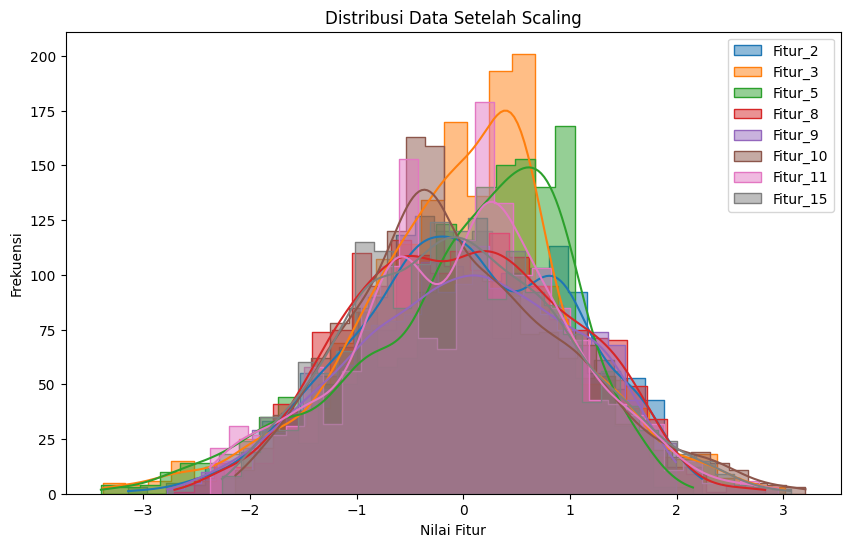

In [58]:
#Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for column in X_resampled.columns:
    sns.histplot(X_resampled[column], kde=True, label=column, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling')
plt.xlabel('Nilai Fitur')
plt.ylabel('Frekuensi')
plt.legend()

In [59]:
X_resampled.describe().T

,count,mean,std,min,25%,50%,75%,max
Fitur_2,1750.0,3.248195e-17,1.000286,-3.140254,-0.675365,0.007020,0.785931,2.237440
Fitur_3,1750.0,-2.436147e-17,1.000286,-3.378635,-0.602653,0.060649,0.580027,3.015720
Fitur_5,1750.0,3.248195e-17,1.000286,-3.395160,-0.587515,0.191619,0.737479,2.152233
Fitur_8,1750.0,-4.060244e-18,1.000286,-2.705454,-0.735012,0.004348,0.733075,2.828207
Fitur_9,1750.0,3.248195e-17,1.000286,-2.773574,-0.729678,0.047436,0.774150,1.990205
Fitur_10,1750.0,0.000000e+00,1.000286,-2.133851,-0.686312,-0.156897,0.660824,3.206305
Fitur_11,1750.0,9.744586e-17,1.000286,-2.375105,-0.656213,0.097781,0.664405,2.949236
Fitur_15,1750.0,-9.744586e-17,1.000286,-2.260982,-0.768530,-0.037969,0.696719,3.067800


Seluruh fitur yang ada kini sudah memiliki rentang yang serupa dan memiliki standar deviasi mendekati satu, Hal ini menunjukan apa yang dilakukan diatas berjalan dengan baik

## Rangkuman Kegiatan

Berikut adalah rangkuman kegiatan yang telah dilakukan dalam notebook ini:

1.  **Import Library, Dataset, Metrics, Model**: Mengimpor berbagai pustaka Python yang diperlukan seperti `pandas`, `numpy`, `matplotlib.pyplot`, `sklearn.datasets.make_classification`, `sklearn.model_selection.train_test_split`, `sklearn.feature_selection.SelectKBest`, `f_classif`, `sklearn.preprocessing.OneHotEncoder`, `StandardScaler`, `KBinsDiscretizer`, `sklearn.compose.ColumnTransformer`, `sklearn.pipeline.Pipeline`, `imblearn.over_sampling.SMOTE`, `collections.Counter`, `sklearn.ensemble.RandomForestClassifier`, dan `sklearn.metrics` untuk tugas-tugas analisis data dan machine learning.

2.  **Create Data**: Membuat dataset klasifikasi sintetis menggunakan `make_classification` dengan 1000 sampel, 15 fitur (10 informatif, 2 redundan), 1 kluster per kelas, dan bobot tidak seimbang ([0.9]) untuk variabel target.

3.  **Create DataFrame**: Mengubah data `X` dan `y` yang dihasilkan menjadi DataFrame `df` dengan nama kolom `Fitur_1` hingga `Fitur_15` untuk fitur dan 'Target' untuk label.

4.  **Simulate Categorical Features**: Menambahkan dua fitur kategorikal baru, `Fitur_12` dan `Fitur_13`, ke DataFrame `df` dengan nilai acak ('A', 'B', 'C') dan ('X', 'Y', 'Z') untuk simulasi data kategorikal.

5.  **Split Features & Target Variable**: Memisahkan fitur (`X`) dari variabel target (`y`) dengan menghapus kolom 'Target' dari `df` untuk `X` dan menetapkan kolom 'Target' ke `y`.

6.  **Check Class Distribution**: Mencetak distribusi kelas variabel `y` menggunakan `collections.Counter` untuk mengidentifikasi ketidakseimbangan kelas (901 sampel untuk kelas 0, 99 untuk kelas 1).

7.  **Feature Selection (Embedded Methods with Random Forest)**:
    *   Menginisialisasi `RandomForestClassifier`.
    *   Menghapus sementara fitur kategorikal (`Fitur_12`, `Fitur_13`) dari `X` untuk membuat `X_integer` yang hanya berisi fitur numerik untuk melatih model Random Forest.
    *   Melatih `rf_model` menggunakan `X_integer` dan `y`.
    *   Mengekstrak `feature_importances_` dari model yang telah dilatih.
    *   Mengurutkan fitur berdasarkan kepentingannya dan menetapkan `threshold` 0.05 untuk memilih fitur penting.
    *   Mencetak fitur-fitur penting beserta nilainya.
    *   Membuat DataFrame `X_important` yang hanya berisi fitur numerik yang terpilih.
    *   Mencetak dimensi dari `X_important`.

8.  **Join X_Important with Categorical Data**: Menggabungkan `X_important` dengan kolom kategorikal asli (`Fitur_12`, `Fitur_13`) dari `df` untuk membentuk `X_selected`.

9.  **Encode Categorical Features**: Menggunakan `LabelEncoder` untuk mengubah kolom kategorikal `Fitur_12` dan `Fitur_13` di `X_selected` menjadi representasi numerik.

10. **Check Outlier (Visualization)**:
    *   Mengidentifikasi kolom numerik dalam `X_selected` (tidak termasuk fitur yang baru di-encode karena secara konseptual mereka kategorikal).
    *   Menggunakan box plot untuk memvisualisasikan outlier dalam kolom numerik tersebut, dengan layout subplot yang rapi.

11. **Delete Outlier**: Mengiterasi setiap kolom numerik yang dipilih.
    *   Menghitung Kuartil Pertama (Q1) dan Kuartil Ketiga (Q3).
    *   Menghitung Interquartile Range (IQR).
    *   Menentukan `lower_bound` dan `upper_bound` menggunakan aturan 1.5 * IQR.
    *   Memfilter dan menghapus baris yang terdeteksi sebagai outlier dari `X_cleaned`.

12. **Check Outlier After Deletion (Visualization)**: Membuat ulang box plot untuk kolom numerik di `X_cleaned` untuk menunjukkan efek penghapusan outlier dan menampilkan DataFrame `X_cleaned` serta dimensinya.

13. **Synthetic Minority Oversampling Technique (SMOTE)**:
    *   Menginisialisasi `SMOTE` dengan `random_state=42`.
    *   Memfilter variabel target `y` agar sesuai dengan indeks `X_cleaned` (dinamai `y_cleaned`).
    *   Menerapkan SMOTE pada `X_cleaned` dan `y_cleaned` untuk menyeimbangkan kelas, menghasilkan `X_resampled` dan `y_resampled`.
    *   Mencetak distribusi kelas setelah SMOTE, menunjukkan kelas yang seimbang.
    *   Mengubah `X_resampled` menjadi DataFrame dan `y_resampled` menjadi Series.

14. **Data Scaling**:
    *   Memvisualisasikan distribusi fitur dalam `X_resampled` sebelum scaling menggunakan histogram.
    *   Menginisialisasi `StandardScaler`.
    *   Menerapkan `StandardScaler` pada `important_features` di `X_resampled` untuk menstandardisasi nilai-nilainya.
    *   Memvisualisasikan distribusi fitur dalam `X_resampled` setelah scaling menggunakan histogram.
    *   Mencetak statistik deskriptif (`describe().T`) dari `X_resampled` untuk menunjukkan efek scaling (mean mendekati 0, standar deviasi mendekati 1).

## Summary:

### Data Analysis Key Findings

*   Kumpulan data klasifikasi sintetis berisi 1000 sampel dengan 15 fitur dibuat, awalnya menunjukkan ketidakseimbangan kelas yang signifikan dengan 901 sampel untuk kelas 0 dan 99 sampel untuk kelas 1.

*   Pemilihan fitur menggunakan metode Random Forest tertanam mengidentifikasi 8 fitur numerik penting berdasarkan ambang batas kepentingan 0,05.

*   Deteksi dan penghapusan outlier menggunakan metode Interquartile Range (IQR) menyebabkan penghapusan 51 baris, mengurangi kumpulan data dari 1000 menjadi 949 sampel.

*   Teknik Synthetic Minority Oversampling (SMOTE) berhasil menyeimbangkan distribusi kelas, menghasilkan 875 sampel untuk kelas 0 dan 875 sampel untuk kelas 1.

*   Fitur numerik distandarisasi menggunakan `StandardScaler`, memastikan fitur tersebut memiliki nilai rata-rata mendekati 0 dan deviasi standar mendekati 1, yang sangat penting bagi banyak algoritma pembelajaran mesin.


### Insights or Next Steps

*   Data telah menjalani proses praproses menyeluruh, termasuk pemilihan fitur, penanganan outlier, penyeimbangan kelas, dan penskalaan, sehingga siap untuk pelatihan dan evaluasi model pembelajaran mesin yang tangguh.

*   Langkah berikutnya harus melibatkan pemisahan data praproses menjadi set pelatihan dan validasi, melatih model pembelajaran mesin (misalnya, Random Forest seperti yang sebelumnya digunakan untuk pemilihan fitur), dan mengevaluasi kinerjanya menggunakan metrik yang tepat untuk tugas klasifikasi yang tidak seimbang.
